# 梯度下降 只能找到局部最优，无法找到全局最优点

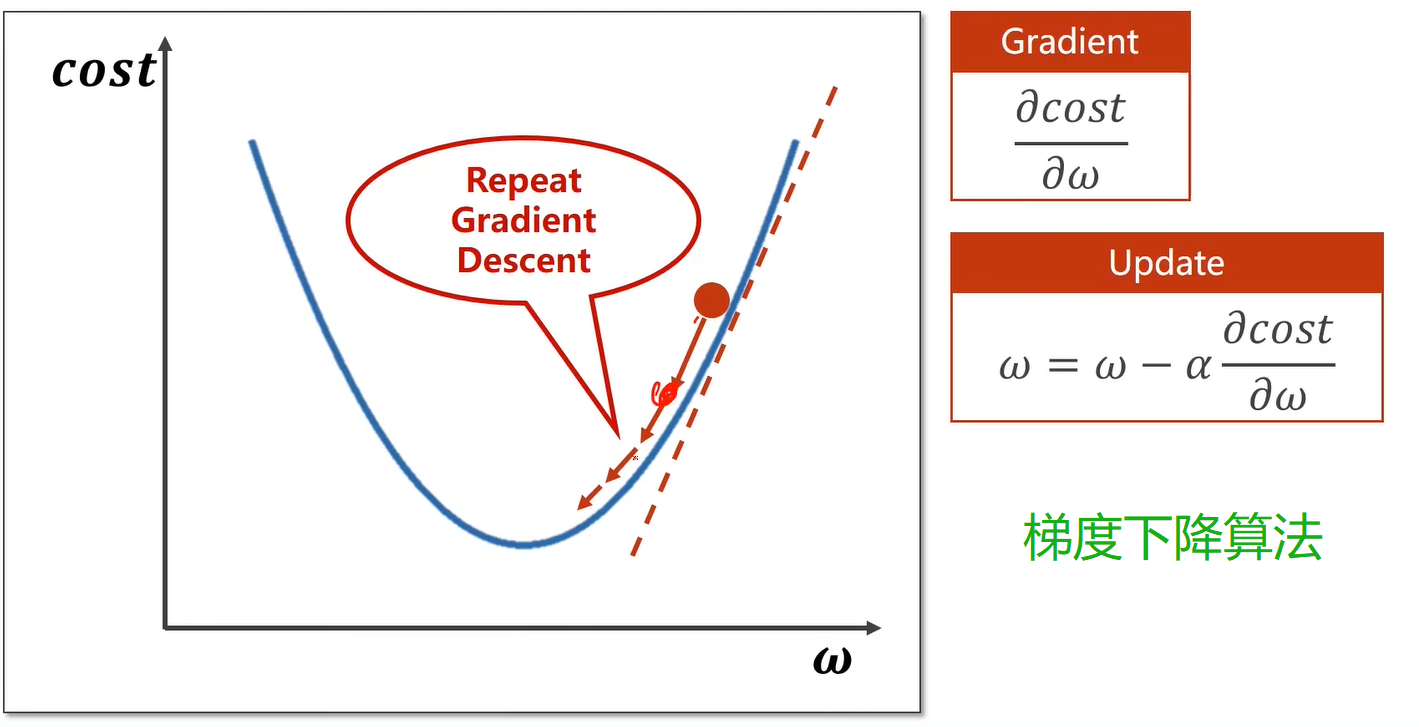

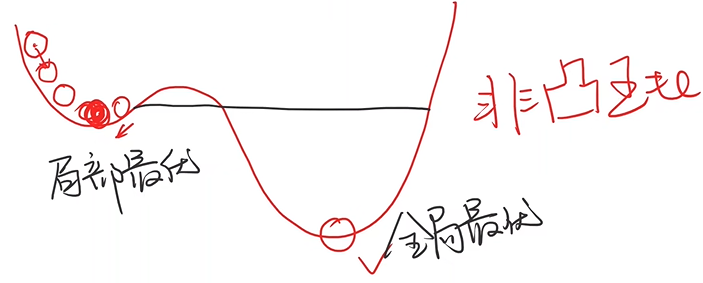

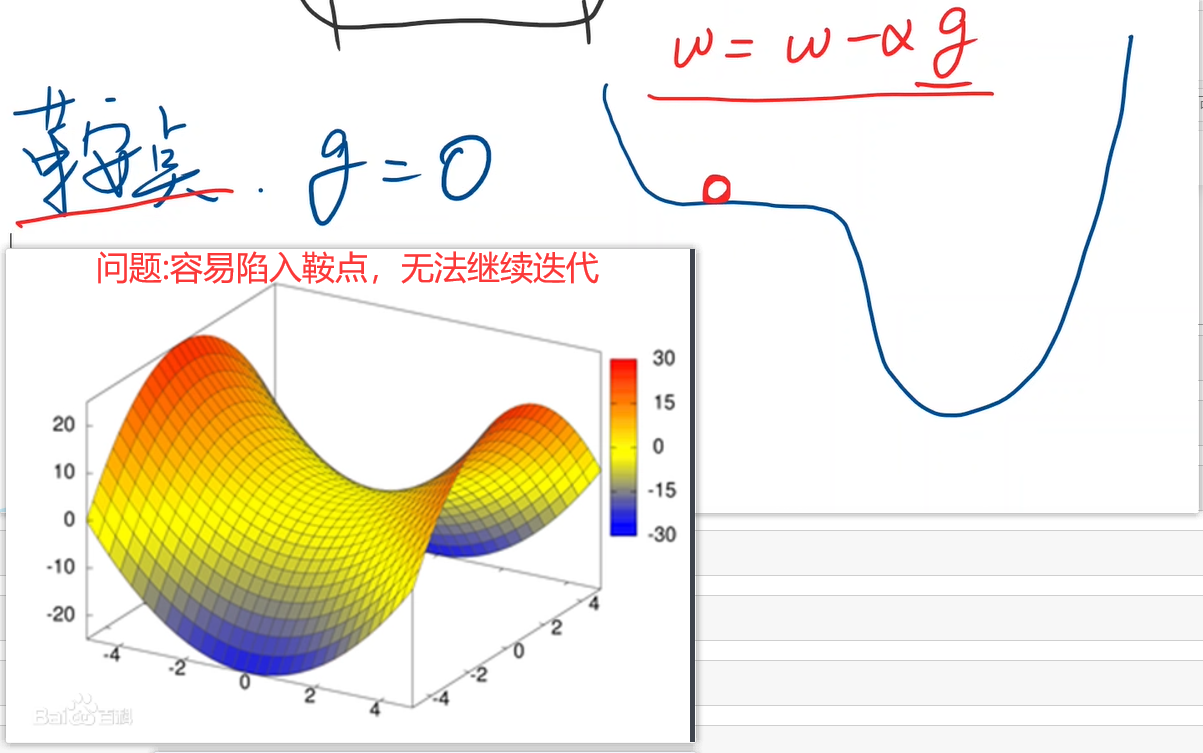

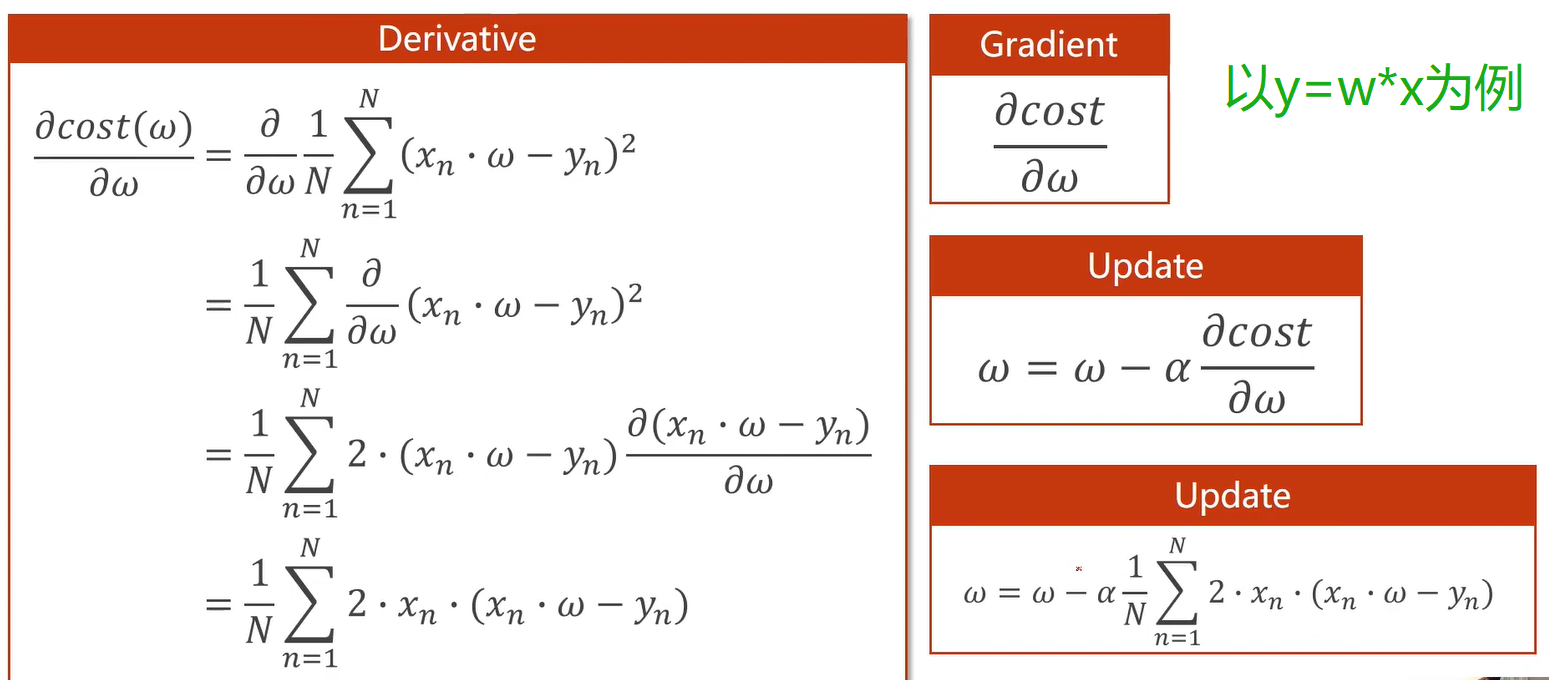

Predict (before training) 4 4
Epoch 0 w= 1.0933333333333333 loss= 4.666666666666667
Epoch 1 w= 1.1779555555555554 loss= 3.8362074074074086
Epoch 2 w= 1.2546797037037036 loss= 3.1535329869958857
Epoch 3 w= 1.3242429313580246 loss= 2.592344272332262
Epoch 4 w= 1.3873135910979424 loss= 2.1310222071581117
Epoch 5 w= 1.4444976559288012 loss= 1.7517949663820642
Epoch 6 w= 1.4963445413754464 loss= 1.440053319920117
Epoch 7 w= 1.5433523841804047 loss= 1.1837878313441108
Epoch 8 w= 1.5859728283235668 loss= 0.9731262101573632
Epoch 9 w= 1.6246153643467005 loss= 0.7999529948031382
Epoch 10 w= 1.659651263674342 loss= 0.6575969151946154
Epoch 11 w= 1.6914171457314033 loss= 0.5405738908195378
Epoch 12 w= 1.7202182121298057 loss= 0.44437576375991855
Epoch 13 w= 1.7463311789976905 loss= 0.365296627844598
Epoch 14 w= 1.7700069356245727 loss= 0.3002900634939416
Epoch 15 w= 1.7914729549662791 loss= 0.2468517784170642
Epoch 16 w= 1.8109354791694263 loss= 0.2029231330489788
Epoch 17 w= 1.8285815011136133 l

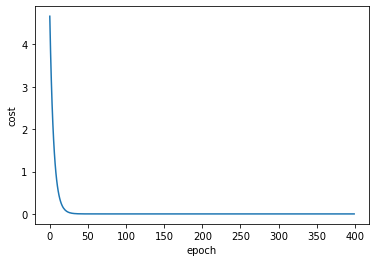

In [11]:
####梯度下降法
import numpy as np
import matplotlib.pyplot as plt

#训练集
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w=1
epoch_list = []
cost_list = []

#定义模型
def forward(x):
    return x*w

#定义损失函数
def cost(xs,ys):
    cost=0
    for x,y in zip(xs,ys):
        y_pred = forward(x)
        cost +=(y_pred-y)**2
    return cost/len(xs)

def gradient(xs,ys):
    grad = 0
    for x,y in zip(xs,ys):
        grad += 2*x*(x*w-y)
    return grad/len(xs)

print("Predict (before training)",4,forward(4))
for epoch in range(400):
    cost_val = cost(x_data,y_data)
    grad_val = gradient(x_data,y_data)
    w -= 0.01*grad_val
    
    epoch_list.append(epoch)
    cost_list.append(cost_val)
    print('Epoch',epoch,'w=',w,'loss=',cost_val)
    
print('Predict (after training)',4,forward(4))
plt.plot(epoch_list,cost_list)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show()



# 随机梯度下降
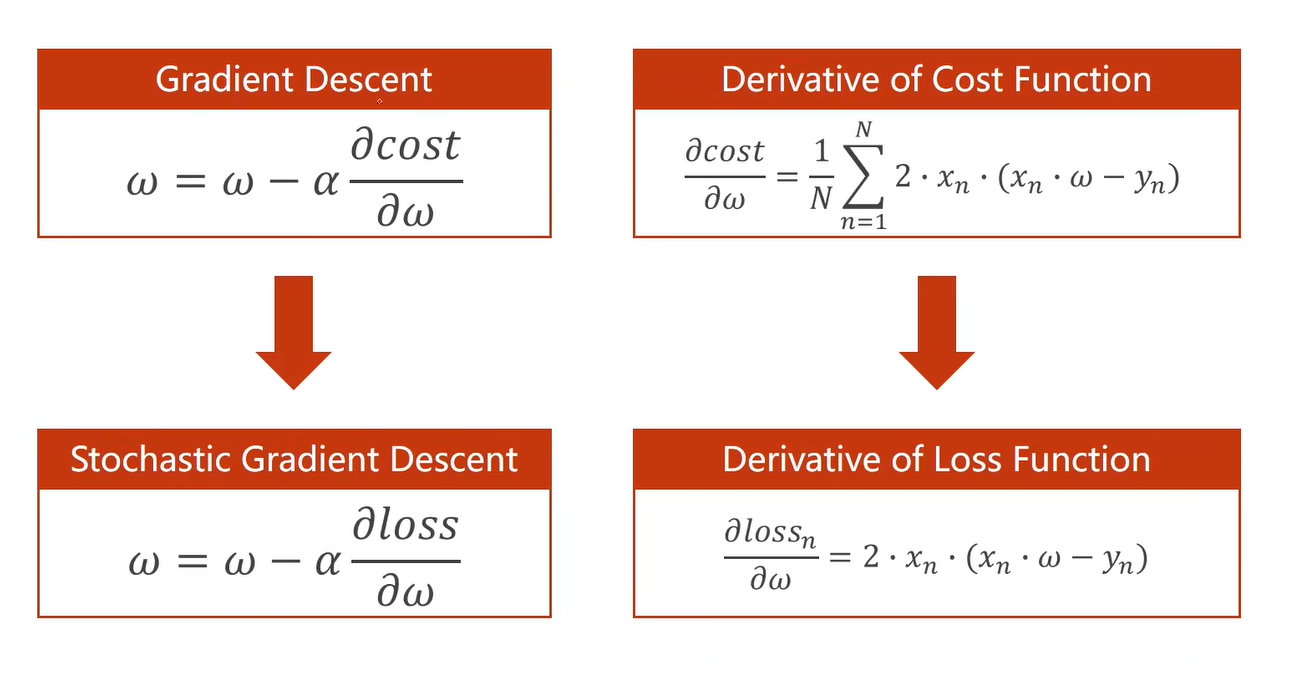

Predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
progess: 0 w= 1.260688 loss= 4.919240100095999
	grad: 1.0 2.0 -1.478624
	grad: 2.0 4.0 -5.796206079999999
	grad: 3.0 6.0 -11.998146585599997
progess: 1 w= 1.453417766656 loss= 2.688769240265834
	grad: 1.0 2.0 -1.093164466688
	grad: 2.0 4.0 -4.285204709416961
	grad: 3.0 6.0 -8.87037374849311
progess: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad: 1.0 2.0 -0.8081896081960389
	grad: 2.0 4.0 -3.1681032641284723
	grad: 3.0 6.0 -6.557973756745939
progess: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad: 1.0 2.0 -0.59750427561463
	grad: 2.0 4.0 -2.3422167604093502
	grad: 3.0 6.0 -4.848388694047353
progess: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad: 1.0 2.0 -0.44174208101320334
	grad: 2.0 4.0 -1.7316289575717576
	grad: 3.0 6.0 -3.584471942173538
progess: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad: 1.0 2.0 -0.3265852213980338
	grad: 2.0 4.0 -1.2802140678802925

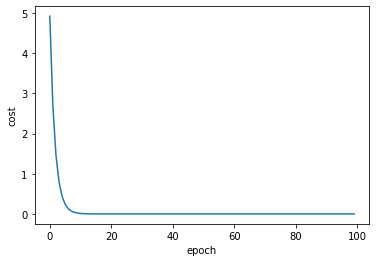

In [10]:
####随机梯度下降法 （无法并行，时间复杂度高）
import numpy as np
import matplotlib.pyplot as plt

#训练集
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w=1.0
epoch_list = []
cost_list = []

#定义模型
def forward(x):
    return x*w

#定义损失函数
def loss(x,y):
    y_pred = forward(x)
    return (y_pred-y) **2

def gradient(x,y):
    return 2*x*(x*w-y)

print("Predict (before training)",4,forward(4))

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        grad = gradient(x,y)
        w =w- 0.01*grad
        print("\tgrad:",x,y,grad)
        l = loss(x,y)
    epoch_list.append(epoch)
    cost_list.append(l)
    print('progess:',epoch,'w=',w,'loss=',l)
    
print('Predict (after training)',4,forward(4))
plt.plot(epoch_list,cost_list)
plt.ylabel('cost')
plt.xlabel('epoch')
plt.show()



#   综合梯度下降和随机梯度下降算法，折中：Batch（Mini-Batch）

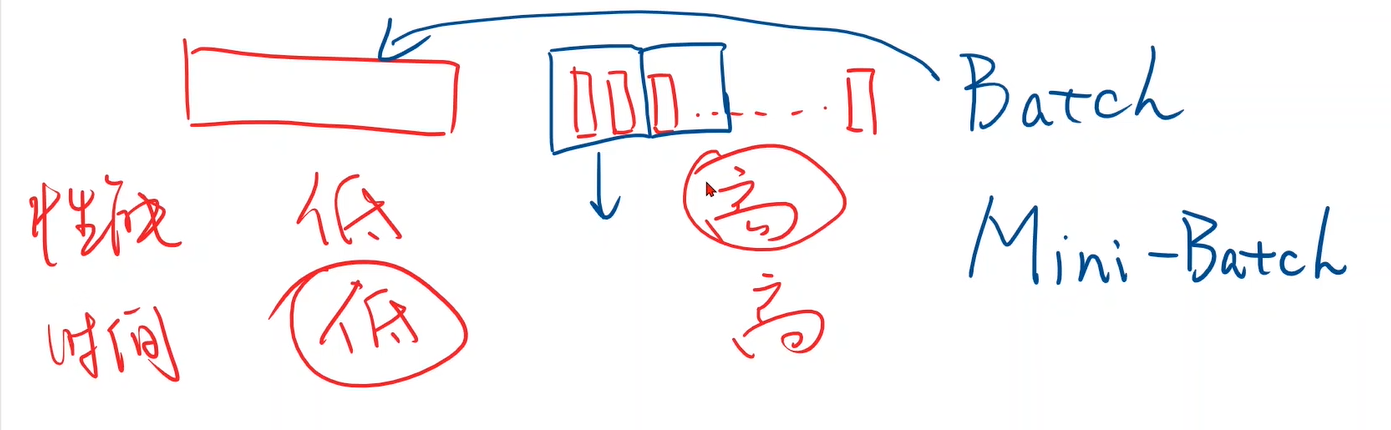